# EDA

In [1]:
import os
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Settings
CREATE_REPORT = False
TEMP_PATH=os.path.join("temp")

In [3]:
train_df = pd.read_pickle(os.path.join(TEMP_PATH, "train.pickle"))

In [4]:
train_df.sample(10)

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
31468,35,private,75855,masters,14,married-civ-spouse,prof-specialty,husband,black,male,7298,0,40,?,>50k
22878,35,self-emp-not-inc,128876,7th-8th,4,married-civ-spouse,farming-fishing,husband,white,male,0,0,40,united-states,<=50k
21309,41,private,172307,9th,5,married-civ-spouse,craft-repair,husband,white,male,0,0,40,united-states,<=50k
10098,51,?,203015,hs-grad,9,married-civ-spouse,?,husband,white,male,0,0,40,united-states,<=50k
14657,33,private,237833,some-college,10,divorced,tech-support,not-in-family,white,female,0,0,40,united-states,<=50k
10519,25,private,199947,hs-grad,9,married-civ-spouse,adm-clerical,wife,white,female,0,0,40,united-states,<=50k
23330,21,?,369084,some-college,10,never-married,?,other-relative,white,male,0,0,10,united-states,<=50k
5968,64,self-emp-inc,165667,doctorate,16,married-civ-spouse,prof-specialty,husband,white,male,7688,0,60,canada,>50k
10082,34,private,187215,bachelors,13,married-civ-spouse,prof-specialty,wife,white,female,15024,0,36,united-states,>50k
23190,51,federal-gov,140516,masters,14,married-civ-spouse,prof-specialty,husband,white,male,0,0,40,united-states,>50k


In [5]:
train_df.shape

(32561, 15)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final_weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Datentypen:
+ numerisch: age, final_weight, education_num, capital_gain, capital_loss, hours_per_week
+ kategorial: workclass, education, marital_status, occupation, relationship, race, sex, native_country, income

In [7]:
train_df[train_df.duplicated()==True]

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4881,25,private,308144,bachelors,13,never-married,craft-repair,not-in-family,white,male,0,0,40,mexico,<=50k
5104,90,private,52386,some-college,10,never-married,other-service,not-in-family,asian-pac-islander,male,0,0,35,united-states,<=50k
9171,21,private,250051,some-college,10,never-married,prof-specialty,own-child,white,female,0,0,10,united-states,<=50k
11631,20,private,107658,some-college,10,never-married,tech-support,not-in-family,white,female,0,0,10,united-states,<=50k
13084,25,private,195994,1st-4th,2,never-married,priv-house-serv,not-in-family,white,female,0,0,40,guatemala,<=50k
15059,21,private,243368,preschool,1,never-married,farming-fishing,not-in-family,white,male,0,0,50,mexico,<=50k
17040,46,private,173243,hs-grad,9,married-civ-spouse,craft-repair,husband,white,male,0,0,40,united-states,<=50k
18555,30,private,144593,hs-grad,9,never-married,other-service,not-in-family,black,male,0,0,40,?,<=50k
18698,19,private,97261,hs-grad,9,never-married,farming-fishing,not-in-family,white,male,0,0,40,united-states,<=50k
21318,19,private,138153,some-college,10,never-married,adm-clerical,own-child,white,female,0,0,10,united-states,<=50k


In [8]:
train_df[train_df["final_weight"]== 379959]

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
16846,35,private,379959,hs-grad,9,divorced,other-service,not-in-family,white,female,0,0,40,united-states,<=50k
32404,35,private,379959,hs-grad,9,divorced,other-service,not-in-family,white,female,0,0,40,united-states,<=50k


In [9]:
train_df[train_df["final_weight"]== 251579]

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
3917,19,private,251579,some-college,10,never-married,other-service,own-child,white,male,0,0,14,united-states,<=50k
31993,19,private,251579,some-college,10,never-married,other-service,own-child,white,male,0,0,14,united-states,<=50k


In [10]:
train_df[train_df["final_weight"]== 144593]

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
16975,30,private,144593,hs-grad,9,never-married,other-service,not-in-family,black,male,0,0,40,?,<=50k
18555,30,private,144593,hs-grad,9,never-married,other-service,not-in-family,black,male,0,0,40,?,<=50k


In [11]:
#die oben als Duplikat identifizierten Zeilen werden gelöscht
train_df = train_df.drop_duplicates()
train_df.shape

(32537, 15)

In [12]:
#wie viele Fälle sind jetzt weg?
32561-32537

24

## Missing Values

In [13]:
train_df.isnull().sum()

age               0
workclass         0
final_weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

## Profiling Report

In [14]:
if CREATE_REPORT:
    ges_train = sv.analyze(train_df)
    ges_train.show_html(os.path.join(TEMP_PATH, 'ges_train.html'))

## Variablenbewertung

Welche Variablen lohnen sich für eine Vorhersage der Einkommenskategorien?
<br>age = ja! 
<br>workclass = schwierig, eher nicht und auch wenig Aussage, da knapp 70% Kategorie privat; missings
<br>final_weight = schwierig, eher nicht. Variable dient der Gewichtung des Falls in Bezug auf die Gesamtbevölkerung bzw repräsentiert sie die Anzahl der Personen, die dem Zensus zufolge durch den Eintrag repräsentiert werden.
<br>education = ja, ggf müssen kleine Kategorien zusammengefasst werden
<br>education_num = ja! für eins entscheiden, da 100% korreliert mit education > ist die Übersetzung von education in numerische Werte
<br>marital_status = ja!
<br>occupation = ja; missings! prot/priv-serv zusammenfassen, armed-forces raus oder zu other services
<br>relationship = nein, auch ähnlich wie marital_status
<br>race = ja , aber vll wenig Aussage, da 80% white
<br>sex = ja
<br>capital_gain = ja
<br>capital_loss = ja
<br>hours_per_week = ja
<br>native_country = ja; missings; irgendwie sinnvoll zusammenfassen zb nach Kontinenten ? ggf auch gedoppelt mit race
<br>income = Zielvariable! liegt als string kategorial vor > sollte in 0|1 umgewandelt werden!

In [15]:
nums = ["age", "education_num", "capital_gain", "capital_loss", "hours_per_week"]
cats = ["marital_status", "race", "sex"] 
cats_todo = ["occupation", "native_country"]
target = ["income"]

lt Profiling Report Korrelation income mit:
<br>education_num 0.34 / age 0.23 / hours_per_week 0.23 / capital_gain 0.22 / capital_loss 0.15

## Untersuchung auf Zusammenhänge

In [16]:
#umwandeln von income in eine binäre numerische Variable, <=50 wird 0, >50 wird 1...
train_df['income'] = train_df['income'].replace({"<=50k": 0, ">50k": 1})
train_df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,state-gov,77516,bachelors,13,never-married,adm-clerical,not-in-family,white,male,2174,0,40,united-states,0
1,50,self-emp-not-inc,83311,bachelors,13,married-civ-spouse,exec-managerial,husband,white,male,0,0,13,united-states,0
2,38,private,215646,hs-grad,9,divorced,handlers-cleaners,not-in-family,white,male,0,0,40,united-states,0
3,53,private,234721,11th,7,married-civ-spouse,handlers-cleaners,husband,black,male,0,0,40,united-states,0
4,28,private,338409,bachelors,13,married-civ-spouse,prof-specialty,wife,black,female,0,0,40,cuba,0


<Axes: xlabel='income'>

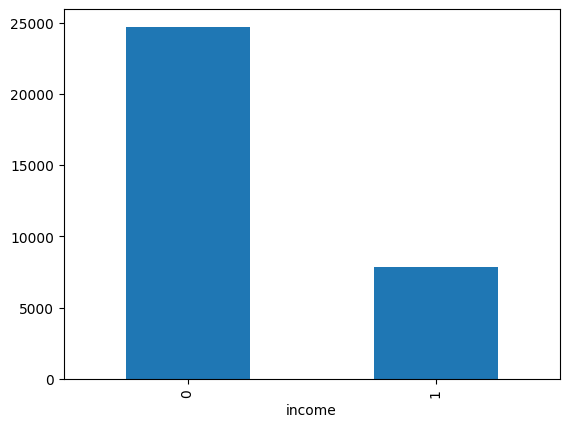

In [17]:
x = train_df["income"].value_counts()
x.plot.bar()

es gibt deutlich mehr Fälle mit niedrigem Einkommen...

aus dem Report:
<br> <=50K 24.720 bzw. 76%
<br>   >50K  7.841 bzw. 24%
<br>  ALL: 32.561 bzw. 100%

In [18]:
#neue Variable, die anhand der Verteilung der Wochenarbeitszeit diese in Kategorien einteilt...bins entsprechen unterer Grenze: 10 = 10 bis 19, 20= 20 bis 29 etc...
train_df['hours_category'] = pd.cut(train_df['hours_per_week'],
                                        bins=[0, 10, 20, 30, 40, 50, 60, 70, np.inf],
                                        labels = [0, 10, 20, 30, 40, 50, 60, 70])

<function matplotlib.pyplot.show(close=None, block=None)>

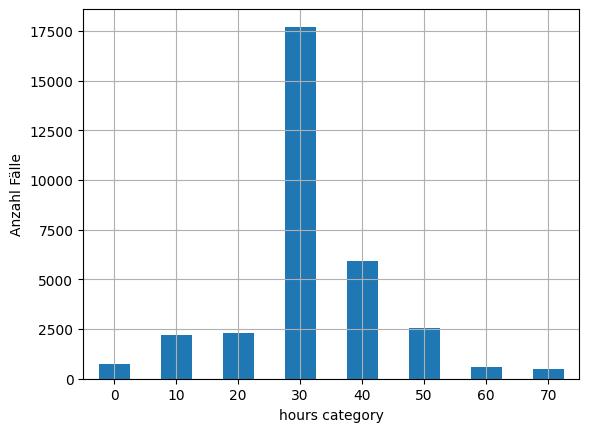

In [19]:
#Visualisierung
train_df['hours_category'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel('hours category')
plt.ylabel('Anzahl Fälle')
plt.show

30 bis 39 Wochenstunden kommt am häufigsten vor, danach 40 bis 49 Std... 10 bis 19, 20 bis 29 und 50 bis 59 sind etwa gleich häufig

In [20]:
#neue Variable, die anhand der Verteilung des Alters diese in Kategorien einteilt...
train_df['age_category'] = pd.cut(train_df['age'],
                                        bins=[15, 20, 30, 40, 50, 60, 70, 80, np.inf],
                                        labels = [15, 20, 30, 40, 50, 60, 70, 80])

<function matplotlib.pyplot.show(close=None, block=None)>

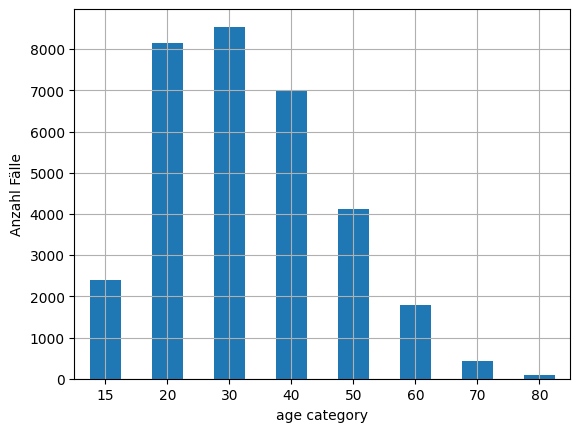

In [21]:
#Visualisierung
train_df['age_category'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel('age category')
plt.ylabel('Anzahl Fälle')
plt.show

die Altersgruppe 30 bis 39Jahre ist am stärksten vertreten, dicht gefolgt von der Gruppe 20 bis 29Jahre, etwas seltener sind dann schon 40 bis 49 Jahre und noch seltener 50 bis 59 Jahre. die kleinsten Gruppen sind 15 bis 19Jahre, und ab 60 Jahre...

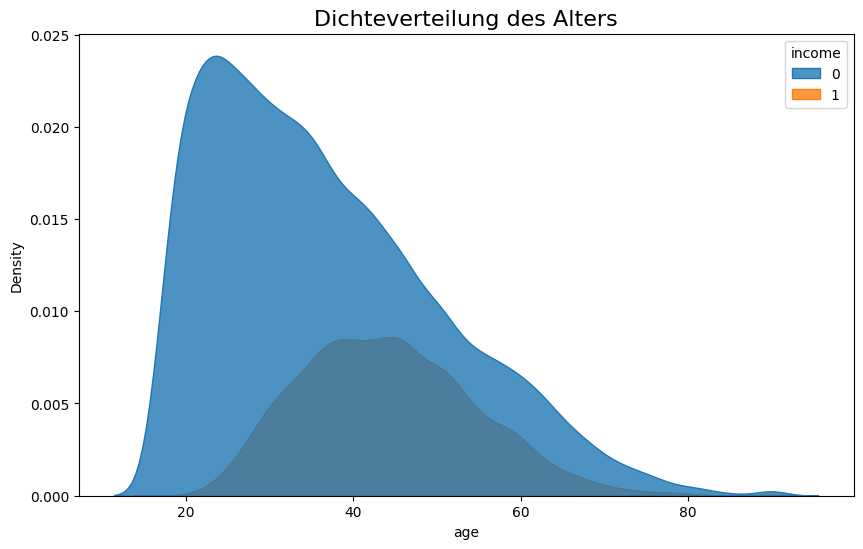

In [22]:
# Dichte Plot erstellen
plt.figure(figsize=(10, 6))
sns.kdeplot(data=train_df, x='age', hue='income', fill=True, alpha=0.8)
plt.title("Dichteverteilung des Alters", fontsize=16)
plt.show()

Das Durchschnittsalter der Gruppe mit hohem Einkommen ist höher > die ältere Generation verfügt über höhere Einkommen als die junge.
<br> insbesondere die Verteilung der Gruppe mit niedrigem Einkommen ist rechtsschief, das heißt, es gibt in den Daten sehr viele junge Menschen unter 40 Jahren, die ein niedriges Einkommen erzielen.

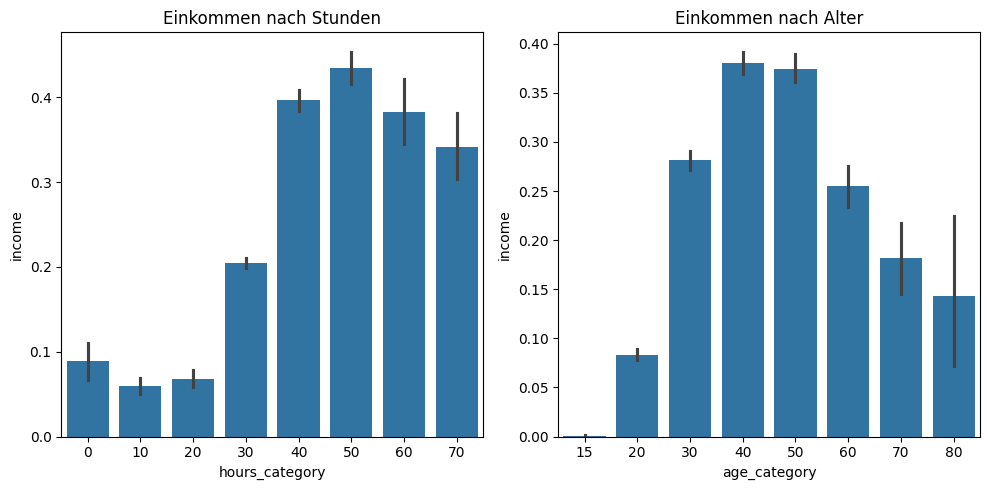

In [23]:
#Wahrscheinlichkeit ein hohes Einkommen zu erzielen nach Stunden und nach Alter
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(x="hours_category", y="income", data=train_df, ax=ax[0])
ax[0].set_title("Einkommen nach Stunden")

sns.barplot(x="age_category", y="income", data=train_df, ax=ax[1])
ax[1].set_title("Einkommen nach Alter")

plt.tight_layout()

Die höchste Chance auf ein Einkommen über 50K liegt in der Gruppe von 50 bis 59Wochenstunden mit 43%, die Gruppen 40 bis 49Stunden und 60 bis 69Stunden haben ebenfalls noch eine ganz gute Chance mit 38% bzw 37%... Ab 70 Wochenstunden erreichen nur noch 33% ein hohes Einkommen, mit 30 bis 39 Stunden immernoch 21%... unter 29Stunden liegt die Chance unter 10%

Die Altersgruppen ab 40Jahre haben die höchste Wahrscheinlichkeit, ein Einkommen über 50K zu erreichen, wobei die Gruppe 40 bis 49Jahre mit etwa 38% Spitzenreiter ist, danach folgt die ältere Gruppe 50 bis 59Jahre mit 38%. Auch die Gruppen 30 bis 39Jahre mit 28% und 60 bis 69Jahre mit 26% haben noch eine höhere Chance auf ein hohes Einkommen. Bei den jüngeren und älteren Personen sieht es schlechter aus: 20 bis 29Jahre 8%, 70 bis 79Jahre 18%, ab 80Jahre 14%...

/var/folders/qm/yvsl2nbx409gx33fl4q1t8vw0000gn/T/ipykernel_19633/1668629227.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
/var/folders/qm/yvsl2nbx409gx33fl4q1t8vw0000gn/T/ipykernel_19633/1668629227.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')


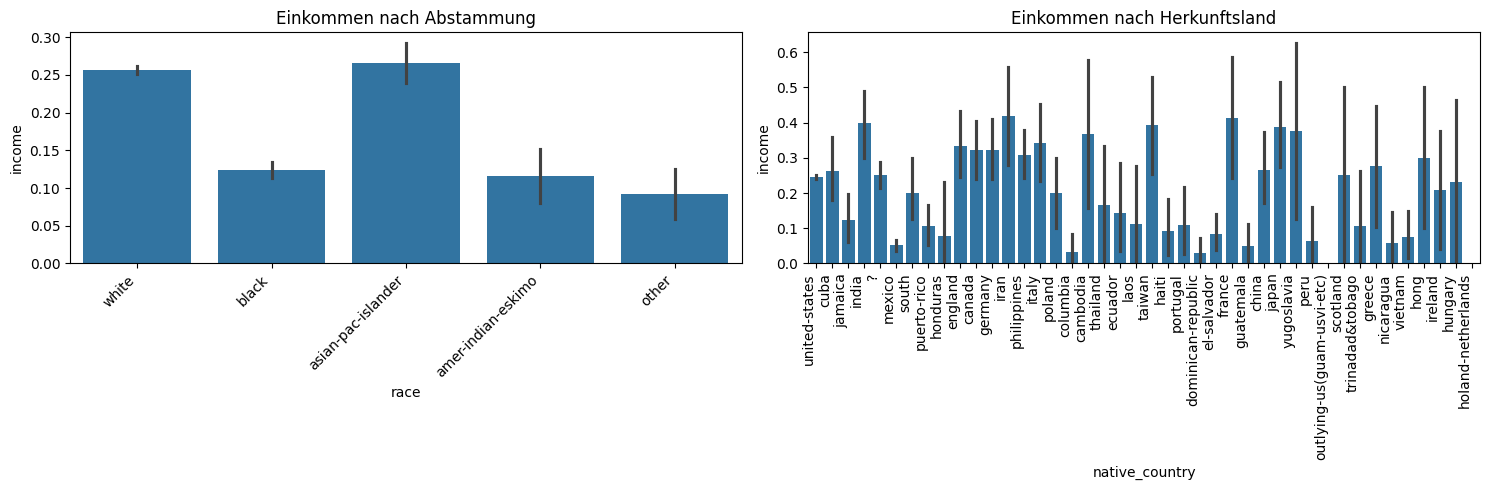

In [24]:
#Wahrscheinlichkeit ein hohes Einkommen zu erzielen nach Abstammung und nach Herkunftsland
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x="race", y="income", data=train_df, ax=ax[0])
ax[0].set_title("Einkommen nach Abstammung")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

sns.barplot(x="native_country", y="income", data=train_df, ax=ax[1])
ax[1].set_title("Einkommen nach Herkunftsland")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')

plt.tight_layout()
plt.show()

die höchsten Chancen auf ein hohes Einkommen haben weiße Menschen und asien-pazifik-Insulaner mit 25% bzw 26%; es folgen Menschen mit schwarzer und indigener/Inuit Abstammung mit 12 bzw 11%

höhere Chancen zwischen 30 bis 40% auf ein hohes Einkommen haben Menschen aus den Herkunftsländern Indien, England, Kanada, Deutschland, Iran, Philippinen, Italien, Kambodscha, Taiwan, Frankreich, Japan, Jugoslawien, Hongkong

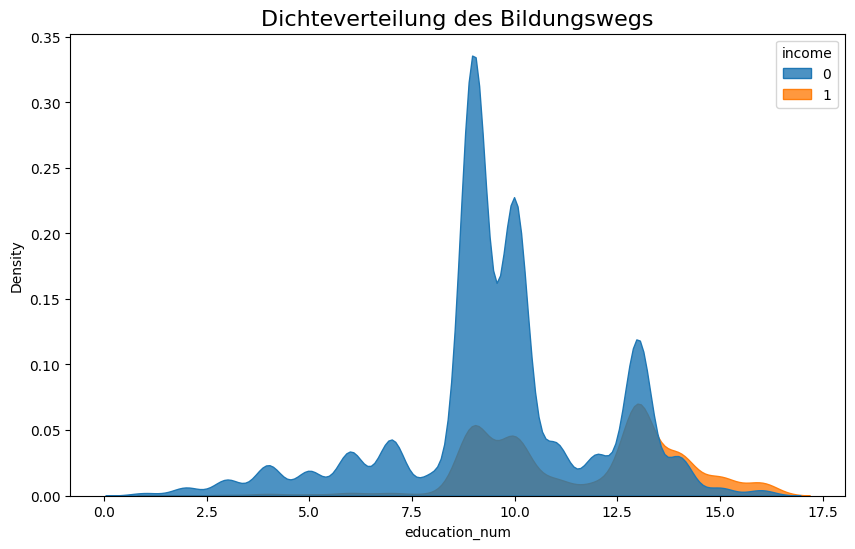

In [25]:
# Dichteverteilung des Bildungswegs
plt.figure(figsize=(10, 6))
sns.kdeplot(data=train_df, x='education_num', hue='income', fill=True, alpha=0.8)

# Titel und Untertitel hinzufügen
plt.title("Dichteverteilung des Bildungswegs", fontsize=16)

# Plot anzeigen
plt.show()

Aus dem Dichte-Diagramm ergibt sich, dass fast alle Personen, die über 50.000 Euro im Jahr verdienen, mindestens 8 Jahre Bildung erhalten haben. 
<br> Aus der Gruppe mit niedrigem Einkommen haben die meisten Personen 9 bis 10 Jahre Bildungsweg. 
<br> Viele Menschen mit einem langen Bildungsweg erzielen dennoch ein geringes Jahreseinkommen.

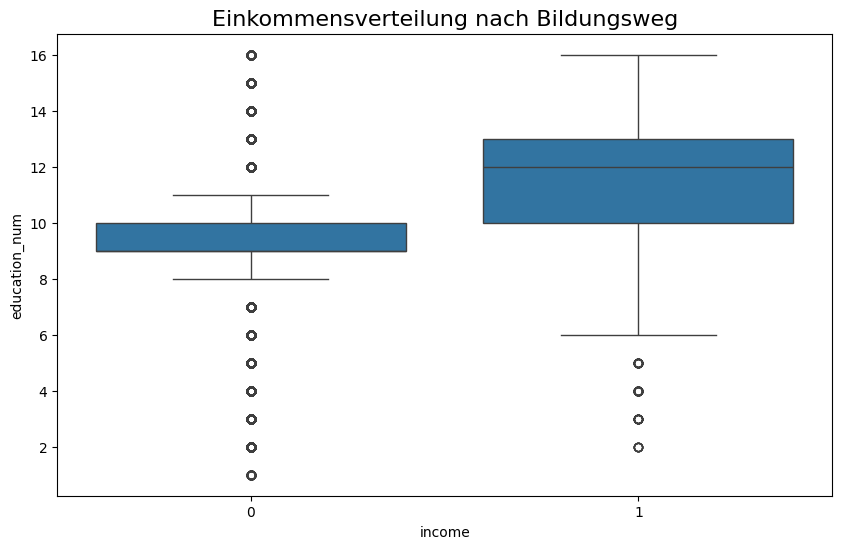

In [26]:
#Boxplot des Bildungswegs
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='income', y='education_num')
plt.title("Einkommensverteilung nach Bildungsweg", fontsize=16)
plt.show()

Im Boxplot ist noch einmal deutlicher zu sehen, dass die Gruppe mit höherem Einkommen eine längeren Bildungsweg hinter sich hat...

/var/folders/qm/yvsl2nbx409gx33fl4q1t8vw0000gn/T/ipykernel_19633/2882208248.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
/var/folders/qm/yvsl2nbx409gx33fl4q1t8vw0000gn/T/ipykernel_19633/2882208248.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')


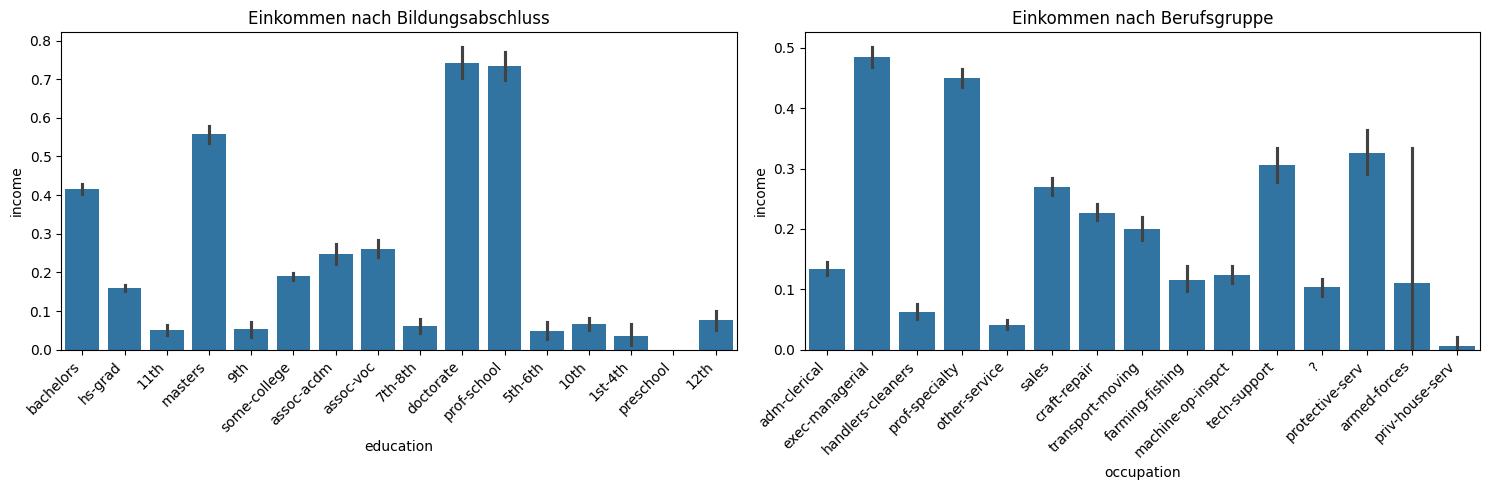

In [27]:
#Wahrscheinlichkeit ein hohes Einkommen zu erzielen  nach Bildungsabschluss und nach Berufsgruppe
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x="education", y="income", data=train_df, ax=ax[0])
ax[0].set_title("Einkommen nach Bildungsabschluss")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

sns.barplot(x="occupation", y="income", data=train_df, ax=ax[1])
ax[1].set_title("Einkommen nach Berufsgruppe")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

die besten Chancen auf ein hohes Einkommen haben Menschen mit den Abschlüssen Doctorates (73%) und Prof-school(72%), der Abschluss Master erreicht 56%, mit einem Bachelor liegt die Wahrscheinlichkeit noch bei 41%; alle anderen Abschlüsse liegen unter 28%...

Führungskräfte liegen mit 48% vorn, es folgen Fachkräfte mit 45%, Schutzdienste mit 35%, technische Kundendienste mit 32%, die Berufsgruppen Verkauf, Handwerk, Transportwesen liegen zwischen 22 bis 28%, alle weiteren Berufgruppen unter 14% 

/var/folders/qm/yvsl2nbx409gx33fl4q1t8vw0000gn/T/ipykernel_19633/2187579420.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
/var/folders/qm/yvsl2nbx409gx33fl4q1t8vw0000gn/T/ipykernel_19633/2187579420.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')


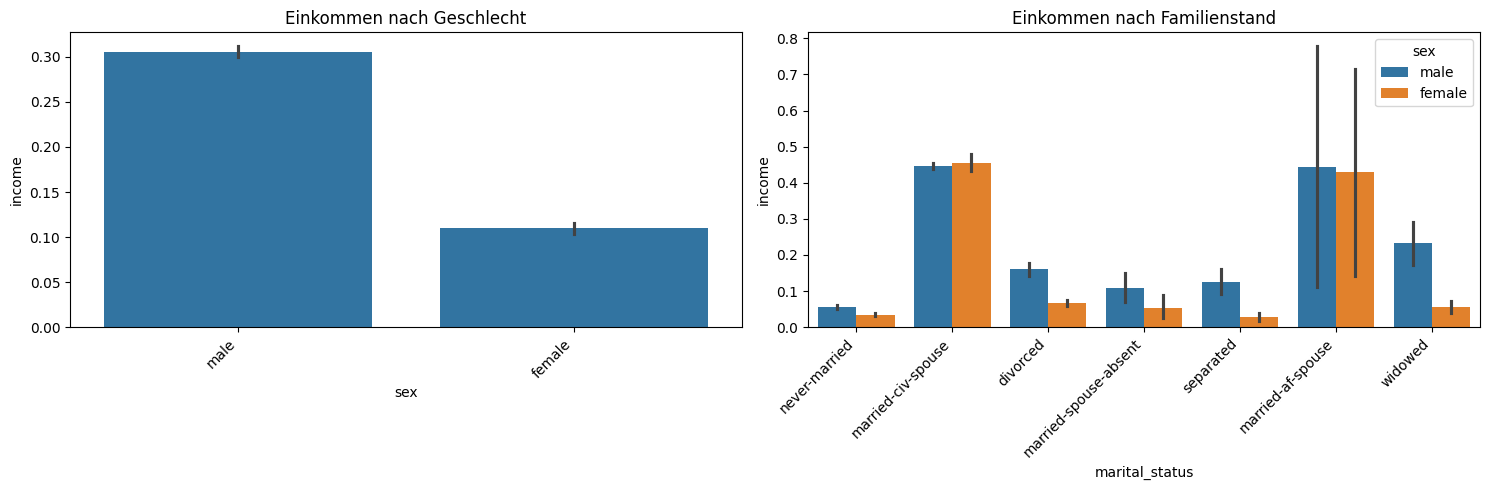

In [28]:
#Wahrscheinlichkeit ein hohes Einkommen zu erzielen nach Geschlecht und nach Familienstand
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x="sex", y="income", data=train_df, ax=ax[0])
ax[0].set_title("Einkommen nach Geschlecht")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

sns.barplot(x="marital_status", y="income", hue="sex", data=train_df, ax=ax[1])
ax[1].set_title("Einkommen nach Familienstand")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Männer haben eine höhere Chance als Frauen ein hohes Einkommen zu erzielen: etwa 30% gegen ca 11%

<br> verheiratete Personen haben die größte Chance auf ein hohes Einkommen mit etwa 45%, alle weiteren Familienstand-Kategorien liegen unter 10%, wobei alleinstehende/geschiedene/verwitwete Frauen immer eine deutlich geringere Chance auf ein hohes Einkommen haben, als Männer; verheiratete Frauen aber eine etwa gleich große Wahrscheinlichkeit erreichen.

In [29]:
#Einteilung der Kapitalgewinne in Bins
train_df['gain_category'] = pd.cut(train_df['capital_gain'], 
                                   bins=[-np.inf, 5000, 10000, 20000, 30000, 40000, 50000, np.inf], 
                                   labels = [0, 5000, 10000, 20000, 30000, 40000, 50000])

<function matplotlib.pyplot.show(close=None, block=None)>

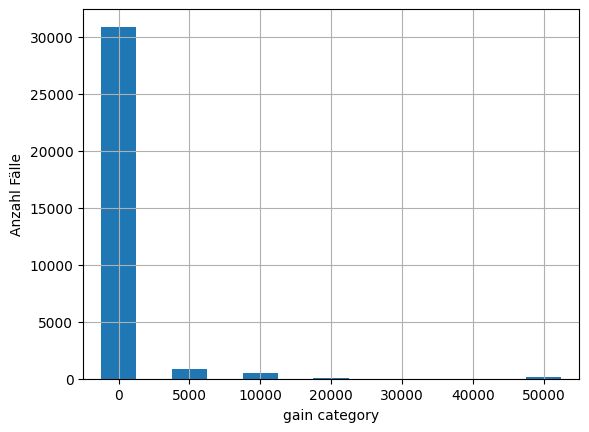

In [30]:
#Visualisierung
train_df['gain_category'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel('gain category')
plt.ylabel('Anzahl Fälle')
plt.show

Die meisten Befragten haben keine Kapitalgewinne!

In [31]:
#Einteilung der Kapitalverluste in Bins
train_df['loss_category'] = pd.cut(train_df['capital_loss'], 
                                   bins=[-np.inf, 1000, 1500, 1750, 2000, 3000, 4000, np.inf], 
                                   labels = [0, 1000, 1500, 1750, 2000, 3000, 4000])

In [32]:
train_df['loss_category'].value_counts()

loss_category
0       31054
1750      684
1500      374
2000      314
1000      100
3000        8
4000        3
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

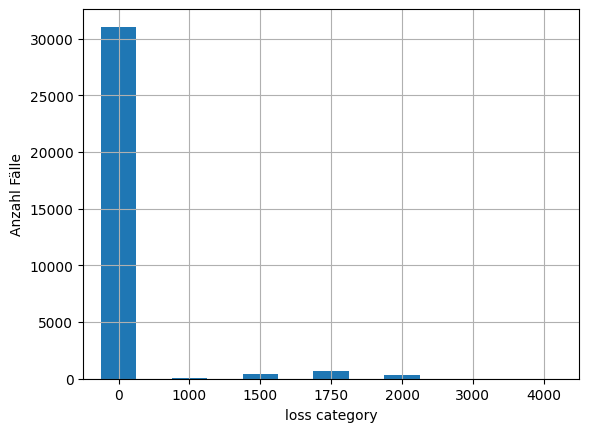

In [33]:
#Visualisierung
train_df['loss_category'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel('loss category')
plt.ylabel('Anzahl Fälle')
plt.show

Die meisten Befragten haben keine Kapitalverluste

/var/folders/qm/yvsl2nbx409gx33fl4q1t8vw0000gn/T/ipykernel_19633/2392538872.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')


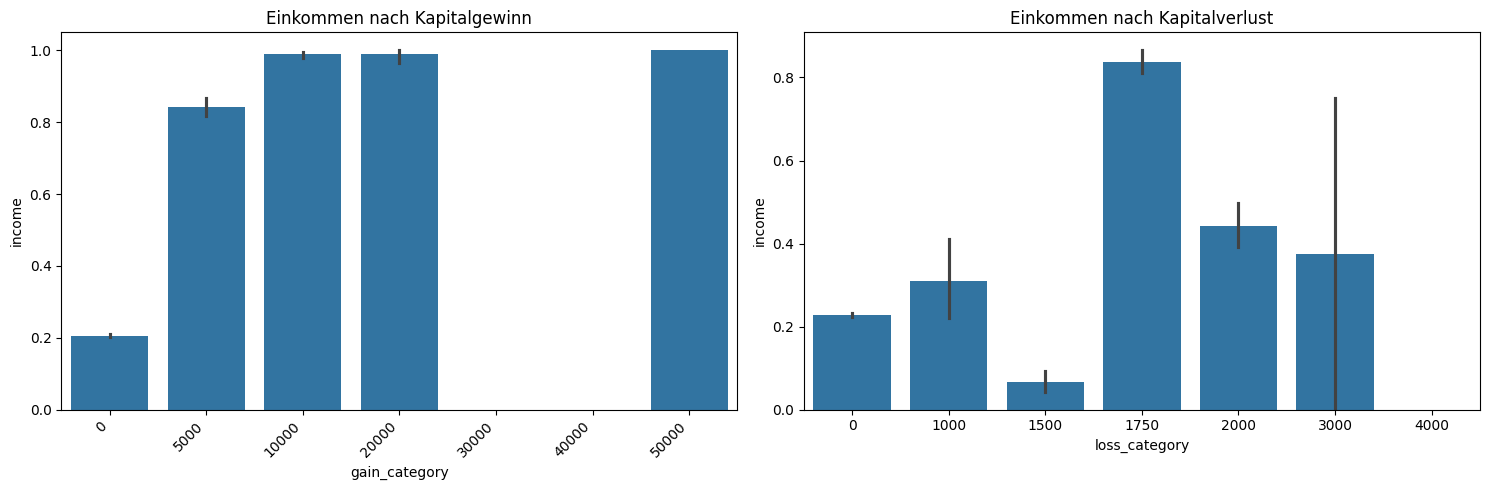

In [34]:
#Wahrscheinlichkeit ein hohes Einkommen zu erzielen nach Kapitalgewinnen und -verlusten
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x="gain_category", y="income", data=train_df, ax=ax[0])
ax[0].set_title("Einkommen nach Kapitalgewinn")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')

sns.barplot(x="loss_category", y="income", data=train_df, ax=ax[1])
ax[1].set_title("Einkommen nach Kapitalverlust")

plt.tight_layout()
plt.show()

bis 10.000Dollar Kapitalgewinne erhöhen die Wahrscheinlichkeit eines hohen Einkommens auf 21%, alle höheren Kapitalgewinne erhöhen die Wahrscheinlichkeit auf 100%

trotz Kapitalverlusten liegt die Wahrscheinlichkeit für ein hohes Einkommen gar nicht niedrig - der Einsatz von Kapital schein sich somit trotz Verlust positiv auf das Einkommen auswirken oder aber Menschen setzen eher Kapital ein, wenn sie sowieso ein hohes Einkommen haben...(?) jedenfalls liegt die Wahrscheinlichkeit für ein hohes Einkommen bei 1750 bis 2000Dollar Verlusten sogar bei 83%, bei 2000 bis 2999Dollar noch bei 43%, 3000 bis 3900 liegt sie noch bei 38%, bei 1000 bis 1499Dollar Verlust liegt die Wahrscheinlichkeit bei 32%, bei 0 bis 999Dollar Verlust immerhin noch bei 21% und bei 1500 bis 1749 Dollar nur noch bei 8%.

## nochmal Missings und Zusammenfassen
wie im Report gesehen, gibt es Zeilen in denen fehlende Werte mit einem ? versehen sind anstatt von NaN...

bei occupation die fehlenden Einträge mit other-service ersetzen (sind <6% der Fälle)
<br>Protective-serv, Priv-house-serv zusammenfassen
<br>Armed-Forces zu other-service

In [35]:
# ? durch ' Other-service' ersetzen
train_df['occupation'] = train_df['occupation'].replace('?', 'other-service')

#'Armed-Forces', 'Protective-serv' und 'Priv-house-serv' durch 'protect-priv-serv' ersetzen
train_df['occupation'] = train_df['occupation'].replace(['armed-Forces', 'protective-serv', 'priv-house-serv'], 'protect-priv-serv')

train_df["occupation"].value_counts()

occupation
other-service        5134
prof-specialty       4136
craft-repair         4094
exec-managerial      4065
adm-clerical         3768
sales                3650
machine-op-inspct    2000
transport-moving     1597
handlers-cleaners    1369
farming-fishing       992
tech-support          927
protect-priv-serv     796
armed-forces            9
Name: count, dtype: int64

bei native_country die fehlenden Einträge mit "unbekannt" ersetzen (sind );
<br>weitere Sortierung zb so:
+ United-States (ggf + Canada?)
+ Mexico
+ Canada
+ Europa:England, Germany, Greece, Italy, Poland, Portugal, Ireland, France, Scotland, Yugoslavia, Holand-Netherlands, Hungary
+ Asien: Cambodia, India, Japan, China, Iran, Philippines, Vietnam, Hong , Taiwan, Laos, Thailand
+ Mittelamerika: Puerto-Rico, Cuba, Honduras, Jamaica, Ecuador, Haiti, Columbia, Guatemala, Nicaragua, Trinadad&Tobago, El-Salvador, Peru, Outlying-US(Guam-USVI-etc), South, Dominican-Republic

In [36]:
def map_countries_to_regions(df):
    # Dictionary-Mappings für die Zuordnung von Ländern zu Regionen
    region_mappings = {
        'united-states': ['united-states'],
        'canada': ['canada'],
        'mexico': ['mexico'],
        'europe': ['england', 'germany', 'greece', 'italy', 'poland', 'portugal', 'ireland', 'france', 'scotland', 'yugoslavia', 'holand-netherlands', 'hungary'],
        'asia': ['cambodia', 'india', 'japan', 'china', 'iran', 'philippines', 'vietnam', 'hong', 'taiwan', 'laos', 'thailand'],
        'mittelamerika': ['puerto-rico', 'cuba', 'honduras', 'jamaica', 'ecuador', 'haiti', 'columbia', 'guatemala', 'nicaragua', 'trinadad&tobago', 'el-salvador', 'peru', 'outlying-us(guam-usvi-etc)', 'south', 'dominican-republic']
    }

    # neue Spalte "native_region" mit Standardwert 'unknown' - ? wird unknown...
    df['native_region'] = 'unknown'

    # Länder im Dictionary durchlaufen und entsprechende Regionen zuweisen
    for region, countries in region_mappings.items():
        df.loc[df['native_country'].isin(countries), 'native_region'] = region

    return df

# Funktion auf den DataFrame anwenden
train_df = map_countries_to_regions(train_df)

In [37]:
train_df["native_region"].value_counts()

native_region
united-states    29153
mittelamerika      850
asia               671
mexico             639
unknown            582
europe             521
canada             121
Name: count, dtype: int64

In [38]:
train_df.to_pickle(os.path.join(TEMP_PATH, "train2.pickle"))